# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research<br>Bert Relation Extraction in Biomedical using Biobert model and pytorch**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# <img src="https://img.icons8.com/tiny-color/48/undefined/experimental-code-tiny-color.png"/> **Source Code on** [**Github**](https://github.com/Dimas263/nlp_bert_relation_extraction)
#  <img src="https://img.icons8.com/glyph-neue/64/undefined/github.png"/> [**NLP - Bert Relation Extraction Biomedical**](https://github.com/Dimas263/nlp_bert_relation_extraction)
# <img src="https://img.icons8.com/color/48/undefined/microsoft-excel-2019--v1.png"/> [**Relation Extraction Report**](https://docs.google.com/spreadsheets/d/1Q6JgAC5rDz4EM00BuAlEaraC0tm3oZoYqBu_F01md7s/edit?usp=sharing)

# <img src="https://img.icons8.com/color/48/undefined/1-circle--v1.png"/>**Connect Google Storage**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Requirements**

In [ ]:
# ! pip install pandas==1.4.2
# ! pip install matplotlib==3.5.1
! pip install openpyxl==3.0.9
# ! pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
! pip install transformers==4.18.0
! pip install scikit-learn==1.0.2
! pip install pickleshare==0.7.5
! pip install pickle5==0.0.12

# <img src="https://img.icons8.com/color/48/undefined/3-circle--v1.png"/>**Check Device**

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    device = torch.device("cuda")
    print("\nUsing GPU")
    print('\nDevice name:', torch.cuda.get_device_name(0))
else:
    print("\nNo GPU available, using the CPU instead.")


Using GPU

Device name: Tesla P100-PCIE-16GB


# <img src="https://img.icons8.com/color/48/undefined/4-circle--v1.png"/>**Data Preprocessing into `train set` and `test set`**

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/data_preprocessing.py"

Negative                583
Treatment_of_disease    507
Cause_of_disease        183
Association              34
Name: relation, dtype: int64
total data : 1307

success to create predict.txt
success to create train.txt
success to create test.txt


# <img src="https://img.icons8.com/color/48/undefined/5-circle--v1.png"/>**Preprocess Program**
### **preprocess data with special token using `biobert pretrained model`**

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biobert_preprocess.sh"

{'output_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/', 'bert_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/', 'data_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/', 'log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/', 'main_log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log', 'preprocess_log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log', 'num_tags': 4, 'seed': 123, 'gpu_ids': '0', 'max_seq_len': 128, 'eval_batch_size': 32, 'swa_start': 3, 'train_epochs': 100, 'dropout_prob': 0.1, 'lr': 2e-05, 'other_lr': 0.0002, 'max_grad_norm': 1, 'warmup_proportion': 0.1, 'weight_decay': 0.01, 'adam_epsilon': 1e-12, 'train_batch_size': 32, 'eval_model': True}
example_text : However, more studies need to further explore the roles of vitex agnus castus in fracture repair processe

# <img src="https://img.icons8.com/color/48/undefined/6-circle--v1.png"/>**Main Program**
### **`train`, `eval`, create new `model pytorch`, test model , <br>compute `cross validation`, `f-1 score`, and <br>test predict data with new model `.pt`**

In [ ]:
f_run_main = open("/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biobert_main.sh", "r")
print(f_run_main.read())

#!/usr/bin/env bash
python "drive/MyDrive/Colab Notebooks/bert_relation_extraction/main.py" \
--bert_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/" \
--data_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--main_log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-main.log" \
--preprocess_log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/Biobert-preprocess.log" \
--output_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=2e-5 \
--other_lr=2e-4 \
--train_batch_size=32 \
--train_epochs=100 \
--eval_batch_size=32 \
--dropout_prob=0.1 \


In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biobert_main.sh"

{'Negative': 0, 'Cause_of_disease': 1, 'Treatment_of_disease': 2, 'Association': 3}
======== Training And Validation========
torch.Size([32, 4, 768])
【train】 epoch：0 step:0/600 loss：1.589890
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.558365 accuracy：0.3830 micro_f1：0.3830 macro_f1：0.1751
------------>Save best model
torch.Size([32, 4, 768])
【train】 epoch：0 step:1/600 loss：1.241251
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.411256 accuracy：0.4043 micro_f1：0.4043 macro_f1：0.1439
torch.Size([32, 4, 768])
【train】 epoch：0 step:2/600 loss：1.209909
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.458149 accuracy：0.3191 micro_f1：0.3191 macro_f1：0.1841
------------>Save best model
torch.Size([32, 4, 768])
【train】 epoch：0 step:3/600 loss：1.111896
torch.Size([32, 4, 768])
torch.Size([15, 4, 768])
【dev】 loss：2.656924 accuracy：0.3191 micro_f1：0.3191 macro_f1：0.1210
torch.Size([32, 4, 768])
【train】 epoch：0 step:4/600 loss：1.285681
torch.Size([32,

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_biobert_predict.sh"

{'Negative': 0, 'Cause_of_disease': 1, 'Treatment_of_disease': 2, 'Association': 3}
======== Prediction ========
OBJECTIVE: To study the role of pecan tree pollen in the development of allergy . 
torch.Size([1, 4, 768])
predict labels：Cause_of_disease
true label：Negative
 Garlic consumption and cancer prevention: meta-analyses of colorectal and stomach cancers . 
torch.Size([1, 4, 768])
predict labels：Association
true label：Negative
Patients with anaphylaxis to pea can have peanut allergy caused by cross-reactive IgE to vicilin (Ara h 1). 
torch.Size([1, 4, 768])
predict labels：Association
true label：Cause_of_disease
Genetic predisposition to schizophrenia associated with increased use of cannabis . 
torch.Size([1, 4, 768])
predict labels：Association
true label：Negative
Efficacy of cancer prevention by high-selenium garlic is primarily dependent on the action of selenium. 
torch.Size([1, 4, 768])
predict labels：Association
true label：Treatment_of_disease
Mutagen sensitivity, tobacco sm

# <img src="https://img.icons8.com/color/48/undefined/7-circle--v1.png"/>**Summary**

### ***Train Output***

In [2]:
import pandas as pd
import csv

url_view = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train-view.csv'
url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train.csv'

biobert_train = pd.read_csv(url_view)

print(biobert_train)

                    Time  Epoch  Step      Loss
0    2022-06-14 20:23:22      0     0  1.589890
1    2022-06-14 20:23:48      0     1  1.241251
2    2022-06-14 20:23:48      0     2  1.209909
3    2022-06-14 20:23:55      0     3  1.111896
4    2022-06-14 20:23:55      0     4  1.285681
..                   ...    ...   ...       ...
595  2022-06-14 20:33:22     99   595  0.001127
596  2022-06-14 20:33:23     99   596  0.000992
597  2022-06-14 20:33:24     99   597  0.001838
598  2022-06-14 20:33:24     99   598  0.001408
599  2022-06-14 20:33:25     99   599  0.000809

[600 rows x 4 columns]


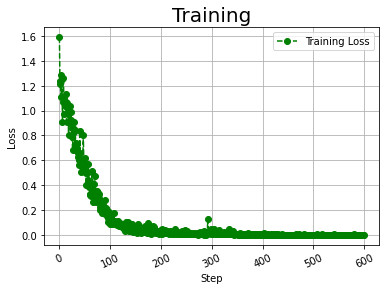

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []

with open(url, 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(int(row[2]))
        y.append(float(row[3]))

plt.plot(x, y, color='g', linestyle='dashed',
         marker='o', label="Training Loss")

plt.xticks(rotation=25)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [4]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train-chart.py"

### ***Dev Output***

In [5]:
dev_url_view = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev-view.csv'
dev_url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev.csv'

biobert_dev = pd.read_csv(dev_url_view)

print(biobert_dev)

                    Time      Loss  accuracy  micro_f1  macro_f1
0    2022-06-14 20:23:22  2.558365    0.3830    0.3830    0.1751
1    2022-06-14 20:23:48  2.411256    0.4043    0.4043    0.1439
2    2022-06-14 20:23:49  2.458149    0.3191    0.3191    0.1841
3    2022-06-14 20:23:55  2.656924    0.3191    0.3191    0.1210
4    2022-06-14 20:23:56  2.627663    0.3191    0.3191    0.1210
..                   ...       ...       ...       ...       ...
595  2022-06-14 20:33:23  2.669860    0.6809    0.6809    0.7607
596  2022-06-14 20:33:23  2.668782    0.6809    0.6809    0.7607
597  2022-06-14 20:33:24  2.666206    0.6809    0.6809    0.7607
598  2022-06-14 20:33:25  2.659776    0.6809    0.6809    0.7607
599  2022-06-14 20:33:25  2.655440    0.6809    0.6809    0.7607

[600 rows x 5 columns]


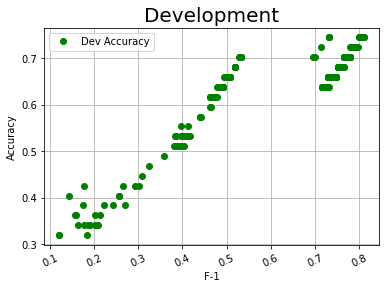

In [6]:
dev_x = []
dev_y = []

with open(dev_url, 'r') as dev_csvfile:
    dev_lines = csv.reader(dev_csvfile, delimiter=',')
    for dev_row in dev_lines:
        dev_x.append(float(dev_row[4]))
        dev_y.append(float(dev_row[2]))

plt.plot(dev_x, dev_y, color='g', linestyle='None',
         marker='o', label="Dev Accuracy")

plt.xticks(rotation=25)
plt.xlabel('F-1')
plt.ylabel('Accuracy')
plt.title('Development', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [7]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev-chart.py"

### ***Training, Validation, Test***

```
2022-06-14 20:29:44,894 - INFO - main.py - train - 86 - 【train】 epoch：49 step:299/600 loss：0.011506
2022-06-14 20:29:45,223 - INFO - main.py - train - 92 - 【dev】 loss：1.801206 accuracy：0.7447 micro_f1：0.7447 macro_f1：0.8104
2022-06-14 20:29:45,224 - INFO - main.py - train - 94 - ------------>Save best model
...
2022-06-14 20:33:26,034 - INFO - main.py - <module> - 247 - ======== Calculate Testing========
2022-06-14 20:33:28,844 - INFO - main.py - <module> - 251 - 【test】 loss：1.801206 accuracy：0.7447 micro_f1：0.7447 macro_f1：0.8104
```

<center>

```yaml
                        precision    recall  per-class   support
                                   f1-scores

            Negative       0.61      0.73      0.67        15
    Cause_of_disease       0.90      0.75      0.82        12
Treatment_of_disease       0.78      0.74      0.76        19
         Association       1.00      1.00      1.00         1

```


<img src="https://img.icons8.com/external-royyan-wijaya-detailed-outline-royyan-wijaya/24/undefined/external-arrow-arrow-line-royyan-wijaya-detailed-outline-royyan-wijaya-8.png"/>


```yaml
                          precision    recall   Average     support
                                    f1-scores

            accuracy                           0.74        47
           macro avg       0.82      0.81      0.81        47
        weighted avg       0.76      0.74      0.75        47
```

</center>

### **Model Output**

In [9]:
! ls -lh "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/Biobert"

total 1.3G
-rw------- 1 root root 1.3G Jun 14 20:30 best.pt


<br><br><br>
# "*Alone we can do so little, together we can do so much*"